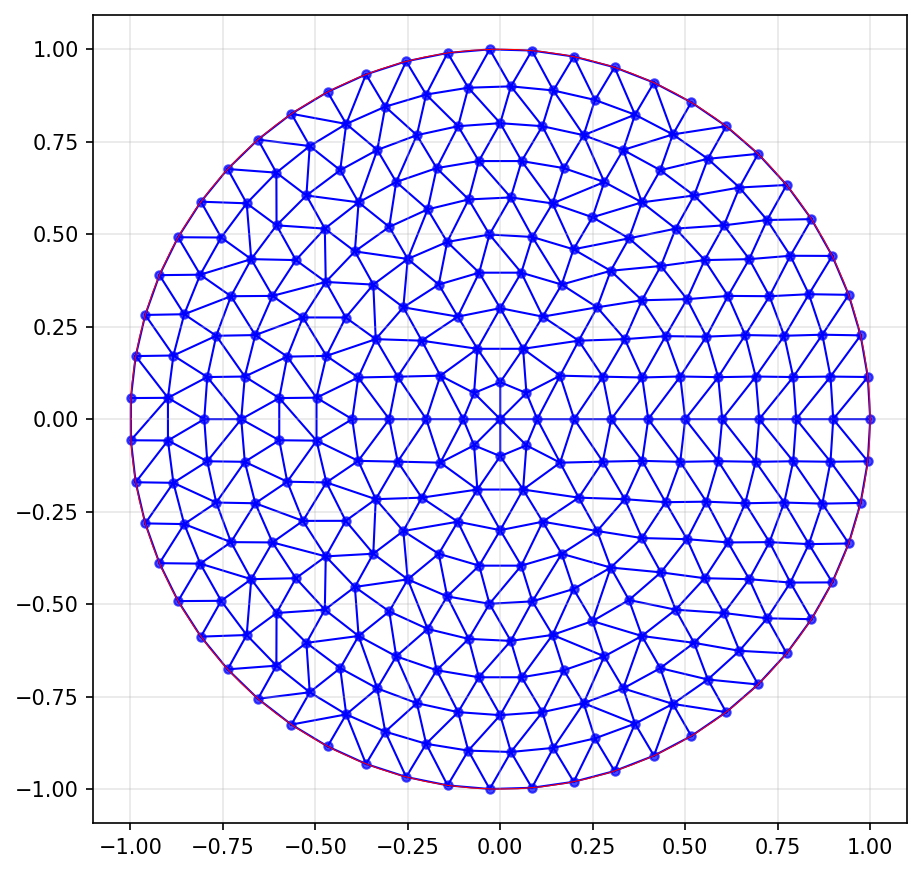

In [56]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

def create_uniform_circle_mesh_single(circle_radius_single=1, boundary_point_count_single=30, layer_count_single=5):
    mesh_points_single = []

    # Создание точек на границе круга
    boundary_angles_single = np.linspace(0, 2 * np.pi, boundary_point_count_single, endpoint=False)
    boundary_x_single = circle_radius_single * np.cos(boundary_angles_single)
    boundary_y_single = circle_radius_single * np.sin(boundary_angles_single)
    boundary_points_single = np.column_stack((boundary_x_single, boundary_y_single))
    mesh_points_single.extend(boundary_points_single)

    # Создание концентрических слоев внутри круга
    for layer_index_single in range(1, layer_count_single):
        current_radius_single = circle_radius_single * (1 - layer_index_single / layer_count_single)

        # Количество точек пропорционально длине окружности
        points_on_current_layer_single = max(8, int(boundary_point_count_single * current_radius_single / circle_radius_single))
        layer_angles_single = np.linspace(0, 2 * np.pi, points_on_current_layer_single, endpoint=False)

        layer_x_single = current_radius_single * np.cos(layer_angles_single)
        layer_y_single = current_radius_single * np.sin(layer_angles_single)
        layer_points_single = np.column_stack((layer_x_single, layer_y_single))

        mesh_points_single.extend(layer_points_single)

    # Добавление центральной точки
    mesh_points_single.append([0, 0])

    return np.array(mesh_points_single)

CIRCLE_RADIUS_SINGLE = 1
BOUNDARY_POINTS_SINGLE = 55
LAYER_COUNT_SINGLE = 10

mesh_points_single = create_uniform_circle_mesh_single(
    circle_radius_single=CIRCLE_RADIUS_SINGLE,
    boundary_point_count_single=BOUNDARY_POINTS_SINGLE,
    layer_count_single=LAYER_COUNT_SINGLE
)

triangulation_single = Delaunay(mesh_points_single)

plt.figure(figsize=(7, 7), dpi=150)

plt.triplot(
    mesh_points_single[:, 0],
    mesh_points_single[:, 1],
    triangulation_single.simplices,
    linewidth=1.0,
    color='blue'
)

plt.plot(
    mesh_points_single[:, 0],
    mesh_points_single[:, 1],
    'o',
    markersize=4,
    alpha=0.7,
    color='blue'
)

circle_angles_single = np.linspace(0, 2 * np.pi, 100)
circle_x_single = np.cos(circle_angles_single)
circle_y_single = np.sin(circle_angles_single)
plt.plot(
    circle_x_single,
    circle_y_single,
    'r-',
    linewidth=0.5,
)

plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

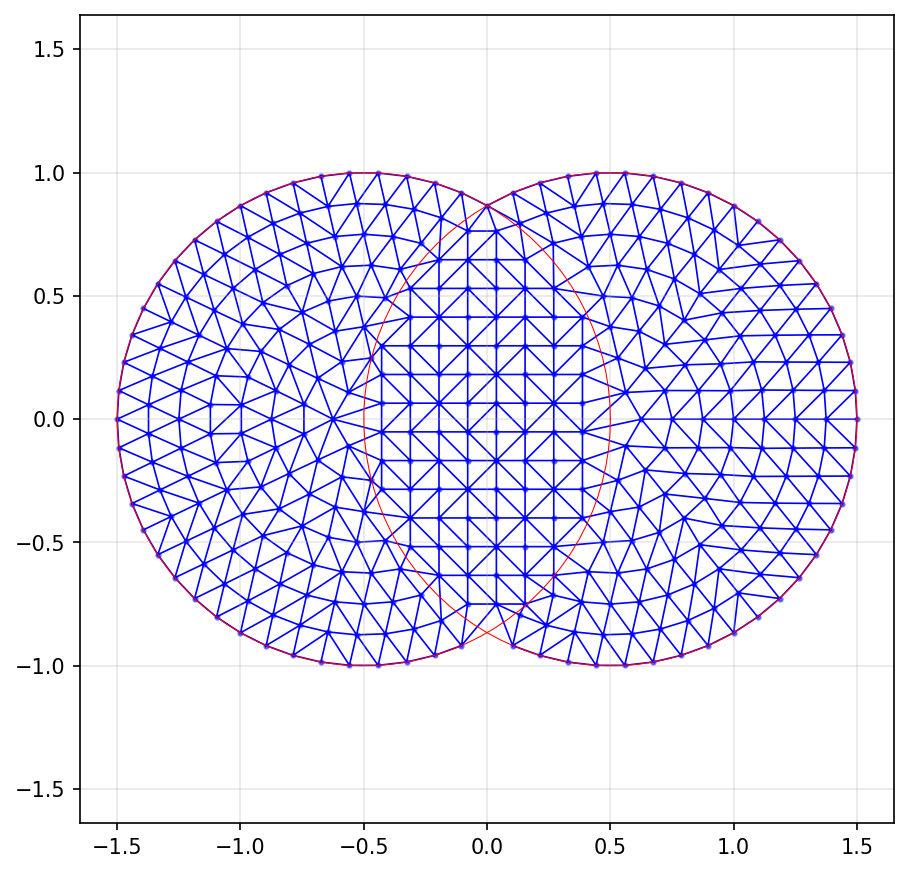

In [57]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

def create_double_circle_mesh_double(circle_radius_double=1, circle_distance_double=0.8, boundary_point_count_double=35):
    mesh_points_double = []

    # Центры кругов
    first_circle_center_double = [-circle_distance_double / 2, 0]
    second_circle_center_double = [circle_distance_double / 2, 0]

    def is_point_in_both_circles_double(x, y):
        in_first_circle_double = np.sqrt((x - first_circle_center_double[0])**2 + (y - first_circle_center_double[1])**2) <= circle_radius_double
        in_second_circle_double = np.sqrt((x - second_circle_center_double[0])**2 + (y - second_circle_center_double[1])**2) <= circle_radius_double
        return in_first_circle_double and in_second_circle_double

    # Расчет размера сетки на основе количества граничных точек
    grid_step_size_double = 2 * np.pi * circle_radius_double / boundary_point_count_double

    # Создание концентрических слоев вне области пересечения
    for circle_center_double in [first_circle_center_double, second_circle_center_double]:
        for layer_index_double in range(8):
            current_radius_double = circle_radius_double * (1 - layer_index_double / 8)
            points_on_layer_double = max(6, int(2 * np.pi * current_radius_double / grid_step_size_double))
            layer_angles_double = np.linspace(0, 2 * np.pi, points_on_layer_double, endpoint=False)

            for angle_double in layer_angles_double:
                x_coord_double = circle_center_double[0] + current_radius_double * np.cos(angle_double)
                y_coord_double = circle_center_double[1] + current_radius_double * np.sin(angle_double)
                if not is_point_in_both_circles_double(x_coord_double, y_coord_double):
                    mesh_points_double.append([x_coord_double, y_coord_double])

    # Создание регулярной сетки в области пересечения
    if circle_distance_double < 2 * circle_radius_double:
        intersection_parameter_double = circle_distance_double / 2
        intersection_height_double = np.sqrt(circle_radius_double**2 - intersection_parameter_double**2)
        intersection_center_double = [0, 0]

        # Координаты для регулярной сетки
        x_range_double = np.arange(-intersection_height_double * 1.3, intersection_height_double * 1.3 + grid_step_size_double, grid_step_size_double)
        y_range_double = np.arange(-intersection_height_double * 1.0, intersection_height_double * 1.0 + grid_step_size_double, grid_step_size_double)

        for x_offset_double in x_range_double:
            for y_offset_double in y_range_double:
                global_x_double = intersection_center_double[0] + x_offset_double
                global_y_double = intersection_center_double[1] + y_offset_double
                if is_point_in_both_circles_double(global_x_double, global_y_double):
                    mesh_points_double.append([global_x_double, global_y_double])

    # Добавление граничных точек вне пересечения
    boundary_angles_double = np.linspace(0, 2 * np.pi, boundary_point_count_double, endpoint=False)
    for circle_center_double in [first_circle_center_double, second_circle_center_double]:
        for angle_double in boundary_angles_double:
            x_coord_double = circle_center_double[0] + circle_radius_double * np.cos(angle_double)
            y_coord_double = circle_center_double[1] + circle_radius_double * np.sin(angle_double)
            if not is_point_in_both_circles_double(x_coord_double, y_coord_double):
                mesh_points_double.append([x_coord_double, y_coord_double])

    # Добавление центров кругов (если не в пересечении)
    if not is_point_in_both_circles_double(first_circle_center_double[0], first_circle_center_double[1]):
        mesh_points_double.append(first_circle_center_double)
    if not is_point_in_both_circles_double(second_circle_center_double[0], second_circle_center_double[1]):
        mesh_points_double.append(second_circle_center_double)

    return np.unique(np.round(mesh_points_double, 6), axis=0)

def is_triangle_edge_inside_figure_double(point_a_double, point_b_double, circle_radius_double=1, circle_distance_double=0.8):
    first_center_double = [-circle_distance_double / 2, 0]
    second_center_double = [circle_distance_double / 2, 0]

    def is_point_inside_figure_double(x, y):
        in_first_circle_double = np.sqrt((x - first_center_double[0])**2 + (y - first_center_double[1])**2) <= circle_radius_double
        in_second_circle_double = np.sqrt((x - second_center_double[0])**2 + (y - second_center_double[1])**2) <= circle_radius_double
        return in_first_circle_double or in_second_circle_double

    edge_midpoint_x_double = (point_a_double[0] + point_b_double[0]) / 2
    edge_midpoint_y_double = (point_a_double[1] + point_b_double[1]) / 2
    return is_point_inside_figure_double(edge_midpoint_x_double, edge_midpoint_y_double)

def filter_invalid_triangles_double(mesh_points_double, triangles_double, circle_radius_double=1, circle_distance_double=0.8):
    valid_triangles_double = []

    for triangle_double in triangles_double:
        vertex_a_double, vertex_b_double, vertex_c_double = mesh_points_double[triangle_double]

        ab_valid_double = is_triangle_edge_inside_figure_double(vertex_a_double, vertex_b_double, circle_radius_double, circle_distance_double)
        bc_valid_double = is_triangle_edge_inside_figure_double(vertex_b_double, vertex_c_double, circle_radius_double, circle_distance_double)
        ca_valid_double = is_triangle_edge_inside_figure_double(vertex_c_double, vertex_a_double, circle_radius_double, circle_distance_double)

        if ab_valid_double and bc_valid_double and ca_valid_double:
            valid_triangles_double.append(triangle_double)

    return np.array(valid_triangles_double)

CIRCLE_DISTANCE_DOUBLE = 1.0
BOUNDARY_POINT_COUNT_DOUBLE = 54

mesh_points_double = create_double_circle_mesh_double(
    circle_radius_double=1,
    circle_distance_double=CIRCLE_DISTANCE_DOUBLE,
    boundary_point_count_double=BOUNDARY_POINT_COUNT_DOUBLE
)

triangulation_double = Delaunay(mesh_points_double)

valid_triangles_double = filter_invalid_triangles_double(
    mesh_points_double,
    triangulation_double.simplices,
    circle_radius_double=1,
    circle_distance_double=CIRCLE_DISTANCE_DOUBLE
)

plt.figure(figsize=(7, 7), dpi=150)

plt.triplot(
    mesh_points_double[:, 0],
    mesh_points_double[:, 1],
    valid_triangles_double,
    linewidth=0.8,
    color='blue'
)

plt.plot(
    mesh_points_double[:, 0],
    mesh_points_double[:, 1],
    'o',
    markersize=2,
    alpha=0.5,
    color='blue'
)

circle_angles_double = np.linspace(0, 2 * np.pi, 100)
plt.plot(
    -CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)
plt.plot(
    CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)

plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

In [58]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

def improve_mesh(points, boundary_mask=None, method='laplacian', iterations=10, alpha=0.5):
    improved_points = points.copy()

    if boundary_mask is None:
        boundary_mask = np.zeros(len(points), dtype=bool)

    if method == 'laplacian':
        for _ in range(iterations):
            new_points = improved_points.copy()
            tri = Delaunay(improved_points)

            for i in range(len(improved_points)):
                if not boundary_mask[i]:
                    neighbors = set()
                    for simplex in tri.simplices:
                        if i in simplex:
                            neighbors.update(simplex)
                    neighbors.discard(i)

                    if neighbors:
                        neighbor_coords = improved_points[list(neighbors)]
                        centroid = neighbor_coords.mean(axis=0)
                        new_points[i] = improved_points[i] + alpha * (centroid - improved_points[i])

            improved_points = new_points

    elif method == 'centroid':
        for _ in range(iterations):
            new_points = improved_points.copy()
            tri = Delaunay(improved_points)

            for i in range(len(improved_points)):
                if not boundary_mask[i]:
                    containing_triangles = []
                    for simplex in tri.simplices:
                        if i in simplex:
                            containing_triangles.append(simplex)

                    if containing_triangles:
                        all_vertices = set()
                        for triangle in containing_triangles:
                            all_vertices.update(triangle)
                        all_vertices.discard(i)

                        if all_vertices:
                            neighbor_coords = improved_points[list(all_vertices)]
                            centroid = neighbor_coords.mean(axis=0)
                            new_points[i] = centroid

            improved_points = new_points

    return improved_points

def delaunay_flips(points, triangles):
    """
    Выполняет flip-операции для приведения триангуляции к условию Делоне
    """
    points = np.array(points)
    # Создаем копию треугольников для модификации
    current_triangles = triangles.copy()

    max_iterations = 50
    iteration = 0
    total_flips = 0

    while iteration < max_iterations:
        flipped_this_iteration = 0

        # Строим словарь ребер для текущей триангуляции
        edges_dict = {}
        for triangle in current_triangles:
            for i in range(3):
                edge = tuple(sorted([triangle[i], triangle[(i+1)%3]]))
                if edge not in edges_dict:
                    edges_dict[edge] = []
                edges_dict[edge].append(triangle)

        new_triangles = current_triangles.copy()

        # Проверяем все внутренние ребра (те, что принадлежат 2 треугольникам)
        for edge, edge_triangles in edges_dict.items():
            if len(edge_triangles) != 2:
                continue  # Пропускаем граничные ребра

            tri1, tri2 = edge_triangles

            # Находим четвертую точку (противоположную ребру)
            points1 = set(tri1)
            points2 = set(tri2)
            all_points = points1.union(points2)

            if len(all_points) != 4:
                continue  # Не quadrilateral

            # Находим две точки, не принадлежащие ребру
            non_edge_points = list(all_points - set(edge))
            if len(non_edge_points) != 2:
                continue

            C, D = non_edge_points
            A, B = edge

            # Проверяем, нужно ли выполнять flip
            if not is_delaunay(points[A], points[B], points[C], points[D]):
                # Создаем новые треугольники
                new_tri1 = [A, C, D]
                new_tri2 = [B, C, D]

                # Заменяем старые треугольники на новые
                new_triangles = [t for t in new_triangles if not np.array_equal(t, tri1) and not np.array_equal(t, tri2)]
                new_triangles.extend([new_tri1, new_tri2])

                flipped_this_iteration += 1
                total_flips += 1

        if flipped_this_iteration == 0:
            break  # Триангуляция удовлетворяет условию Делоне

        current_triangles = new_triangles
        iteration += 1

    return np.array(current_triangles)

def is_delaunay(a, b, c, d):
    """
    Проверяет, удовлетворяет ли ребро AB критерию Делоне
    Возвращает True, если точка D не лежит внутри описанной окружности треугольника ABC
    """
    # Координаты точек
    ax, ay = a
    bx, by = b
    cx, cy = c
    dx, dy = d

    # Матрица для вычисления ориентации
    matrix = np.array([
        [ax-dx, ay-dy, (ax-dx)**2 + (ay-dy)**2],
        [bx-dx, by-dy, (bx-dx)**2 + (by-dy)**2],
        [cx-dx, cy-dy, (cx-dx)**2 + (cy-dy)**2]
    ])

    # Определитель матрицы
    det = np.linalg.det(matrix)

    # Если определитель > 0, точка D лежит внутри окружности (нарушение Делоне)
    return det <= 0

def calculate_mesh_quality(points, triangles):
    qualities = []
    for triangle in triangles:
        a, b, c = points[triangle]
        sides = [
            np.linalg.norm(a - b),
            np.linalg.norm(b - c),
            np.linalg.norm(c - a)
        ]
        quality = min(sides) / max(sides)
        qualities.append(quality)
    return np.mean(qualities)

def calculate_mesh_quality_rms(points, triangles):
    """
    Вычисляет качество сетки используя RMS (среднеквадратичное) вместо среднего арифметического
    """
    qualities = []
    for triangle in triangles:
        a, b, c = points[triangle]
        sides = [
            np.linalg.norm(a - b),
            np.linalg.norm(b - c),
            np.linalg.norm(c - a)
        ]
        quality = min(sides) / max(sides)
        qualities.append(quality)

    # RMS вместо mean
    return np.sqrt(np.mean(np.square(qualities)))


Качество исходной сетки: 0.8037
Качество после Лапласиана: 0.8841
Качество после Центроидов: 0.8856
Качество после Delaunay flips (исходная): 0.6598

Улучшение Лапласиан: 10.0%
Улучшение Центроиды: 10.2%
Улучшение Delaunay flips: -17.9%


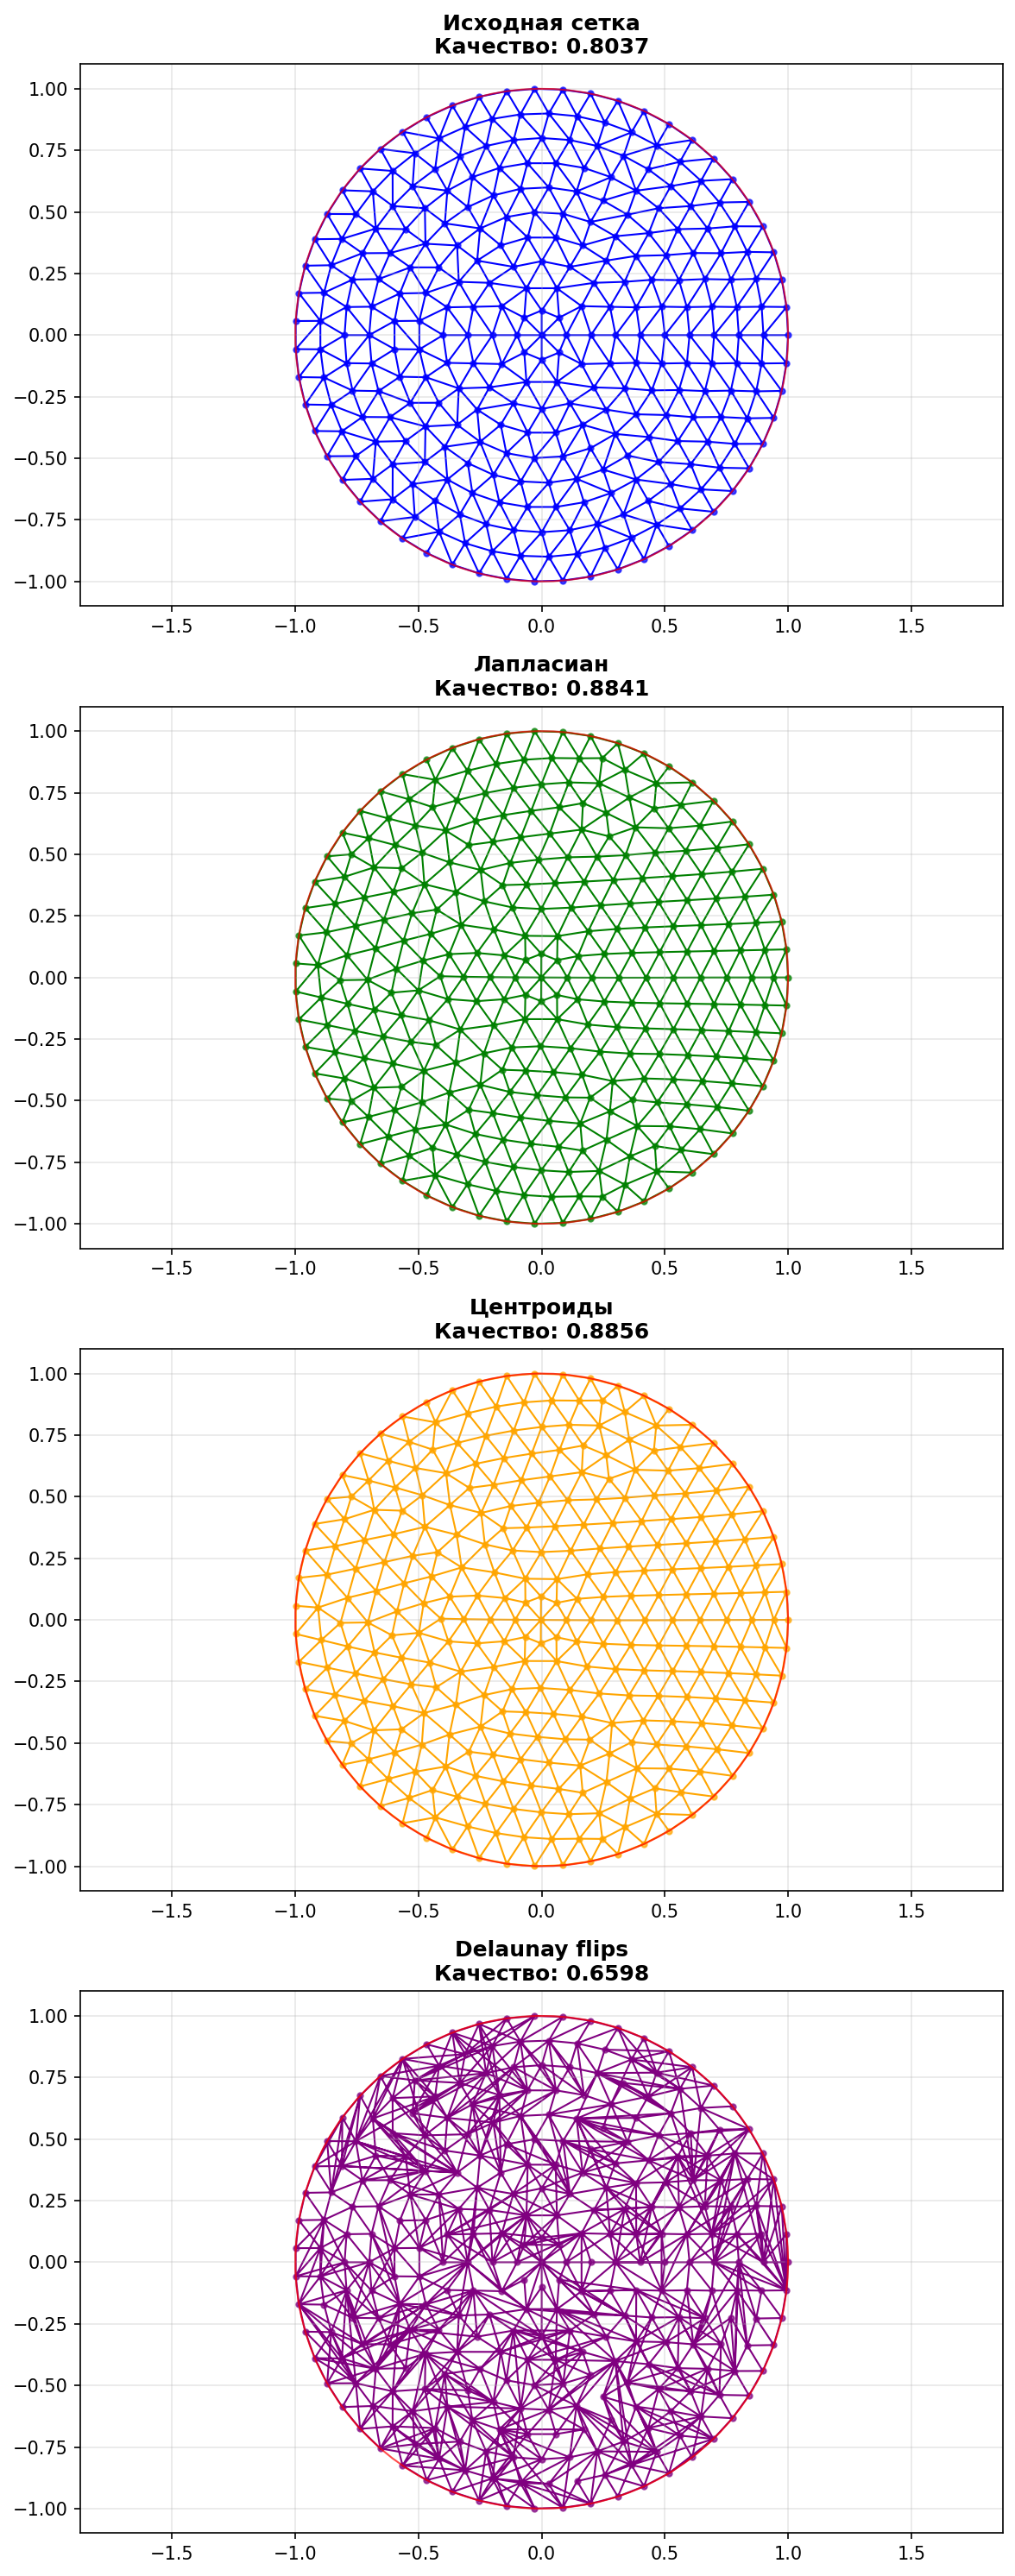

In [59]:
# Определяем граничные точки (уточненный критерий)
center_single = np.array([0, 0])
boundary_mask_single = np.linalg.norm(mesh_points_single - center_single, axis=1) > 0.98  # Более точная граница

# Улучшаем сетку двумя методами
improved_points_laplacian = improve_mesh(
    mesh_points_single,
    boundary_mask=boundary_mask_single,
    method='laplacian',
    iterations=20,
    alpha=0.6
)

improved_points_centroid = improve_mesh(
    mesh_points_single,
    boundary_mask=boundary_mask_single,
    method='centroid',
    iterations=20,
    alpha=0.6
)

# Триангулируем улучшенные сетки
triangulation_laplacian = Delaunay(improved_points_laplacian)
triangulation_centroid = Delaunay(improved_points_centroid)

# Применяем Delaunay flips к разным сеткам для сравнения
triangles_after_flips_original = delaunay_flips(mesh_points_single, triangulation_single.simplices)

# Вычисляем качество сеток
quality_original_single = calculate_mesh_quality_rms(mesh_points_single, triangulation_single.simplices)
quality_laplacian = calculate_mesh_quality_rms(improved_points_laplacian, triangulation_laplacian.simplices)
quality_centroid = calculate_mesh_quality_rms(improved_points_centroid, triangulation_centroid.simplices)
quality_flips_original = calculate_mesh_quality_rms(mesh_points_single, triangles_after_flips_original)

print(f"Качество исходной сетки: {quality_original_single:.4f}")
print(f"Качество после Лапласиана: {quality_laplacian:.4f}")
print(f"Качество после Центроидов: {quality_centroid:.4f}")
print(f"Качество после Delaunay flips (исходная): {quality_flips_original:.4f}")
print()
print(f"Улучшение Лапласиан: {((quality_laplacian - quality_original_single) / quality_original_single * 100):.1f}%")
print(f"Улучшение Центроиды: {((quality_centroid - quality_original_single) / quality_original_single * 100):.1f}%")
print(f"Улучшение Delaunay flips: {((quality_flips_original - quality_original_single) / quality_original_single * 100):.1f}%")

# Визуализация сравнения - вертикальное расположение
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 20), dpi=150)

# Исходная сетка (синяя)
ax1.triplot(
    mesh_points_single[:, 0],
    mesh_points_single[:, 1],
    triangulation_single.simplices,
    linewidth=1.0,
    color='blue'
)

ax1.plot(
    mesh_points_single[:, 0],
    mesh_points_single[:, 1],
    'o',
    markersize=3,
    alpha=0.7,
    color='blue'
)

circle_angles_single = np.linspace(0, 2 * np.pi, 100)
circle_x_single = np.cos(circle_angles_single)
circle_y_single = np.sin(circle_angles_single)
ax1.plot(
    circle_x_single,
    circle_y_single,
    'r-',
    linewidth=1.0,
    alpha=0.7
)

ax1.axis('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title(f'Исходная сетка\nКачество: {quality_original_single:.4f}', fontsize=12, fontweight='bold')

# Улучшенная сетка методом Лапласиана (зеленая)
ax2.triplot(
    improved_points_laplacian[:, 0],
    improved_points_laplacian[:, 1],
    triangulation_laplacian.simplices,
    linewidth=1.0,
    color='green'
)

ax2.plot(
    improved_points_laplacian[:, 0],
    improved_points_laplacian[:, 1],
    'o',
    markersize=3,
    alpha=0.7,
    color='green'
)

ax2.plot(
    circle_x_single,
    circle_y_single,
    'r-',
    linewidth=1.0,
    alpha=0.7
)

ax2.axis('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title(f'Лапласиан\nКачество: {quality_laplacian:.4f}', fontsize=12, fontweight='bold')

# Улучшенная сетка методом Центроидов (оранжевая)
ax3.triplot(
    improved_points_centroid[:, 0],
    improved_points_centroid[:, 1],
    triangulation_centroid.simplices,
    linewidth=1.0,
    color='orange'
)

ax3.plot(
    improved_points_centroid[:, 0],
    improved_points_centroid[:, 1],
    'o',
    markersize=3,
    alpha=0.7,
    color='orange'
)

ax3.plot(
    circle_x_single,
    circle_y_single,
    'r-',
    linewidth=1.0,
    alpha=0.7
)

ax3.axis('equal')
ax3.grid(True, alpha=0.3)
ax3.set_title(f'Центроиды\nКачество: {quality_centroid:.4f}', fontsize=12, fontweight='bold')

# Сетка после Delaunay flips (фиолетовая) - показываем лучший результат
best_flips_points = mesh_points_single
best_flips_triangles = triangles_after_flips_original
best_flips_quality = quality_flips_original

ax4.triplot(
    best_flips_points[:, 0],
    best_flips_points[:, 1],
    best_flips_triangles,
    linewidth=1.0,
    color='purple'
)

ax4.plot(
    best_flips_points[:, 0],
    best_flips_points[:, 1],
    'o',
    markersize=3,
    alpha=0.7,
    color='purple'
)

ax4.plot(
    circle_x_single,
    circle_y_single,
    'r-',
    linewidth=1.0,
    alpha=0.7
)

ax4.axis('equal')
ax4.grid(True, alpha=0.3)
ax4.set_title(f'Delaunay flips\nКачество: {best_flips_quality:.4f}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Качество исходной сетки: 0.7491
Качество после Лапласиана: 0.8367
Качество после Центроидов: 0.8401
Качество после Delaunay flips: 0.6061
Улучшение Лапласиан: 11.7%
Улучшение Центроиды: 12.2%
Улучшение Delaunay flips: -19.1%


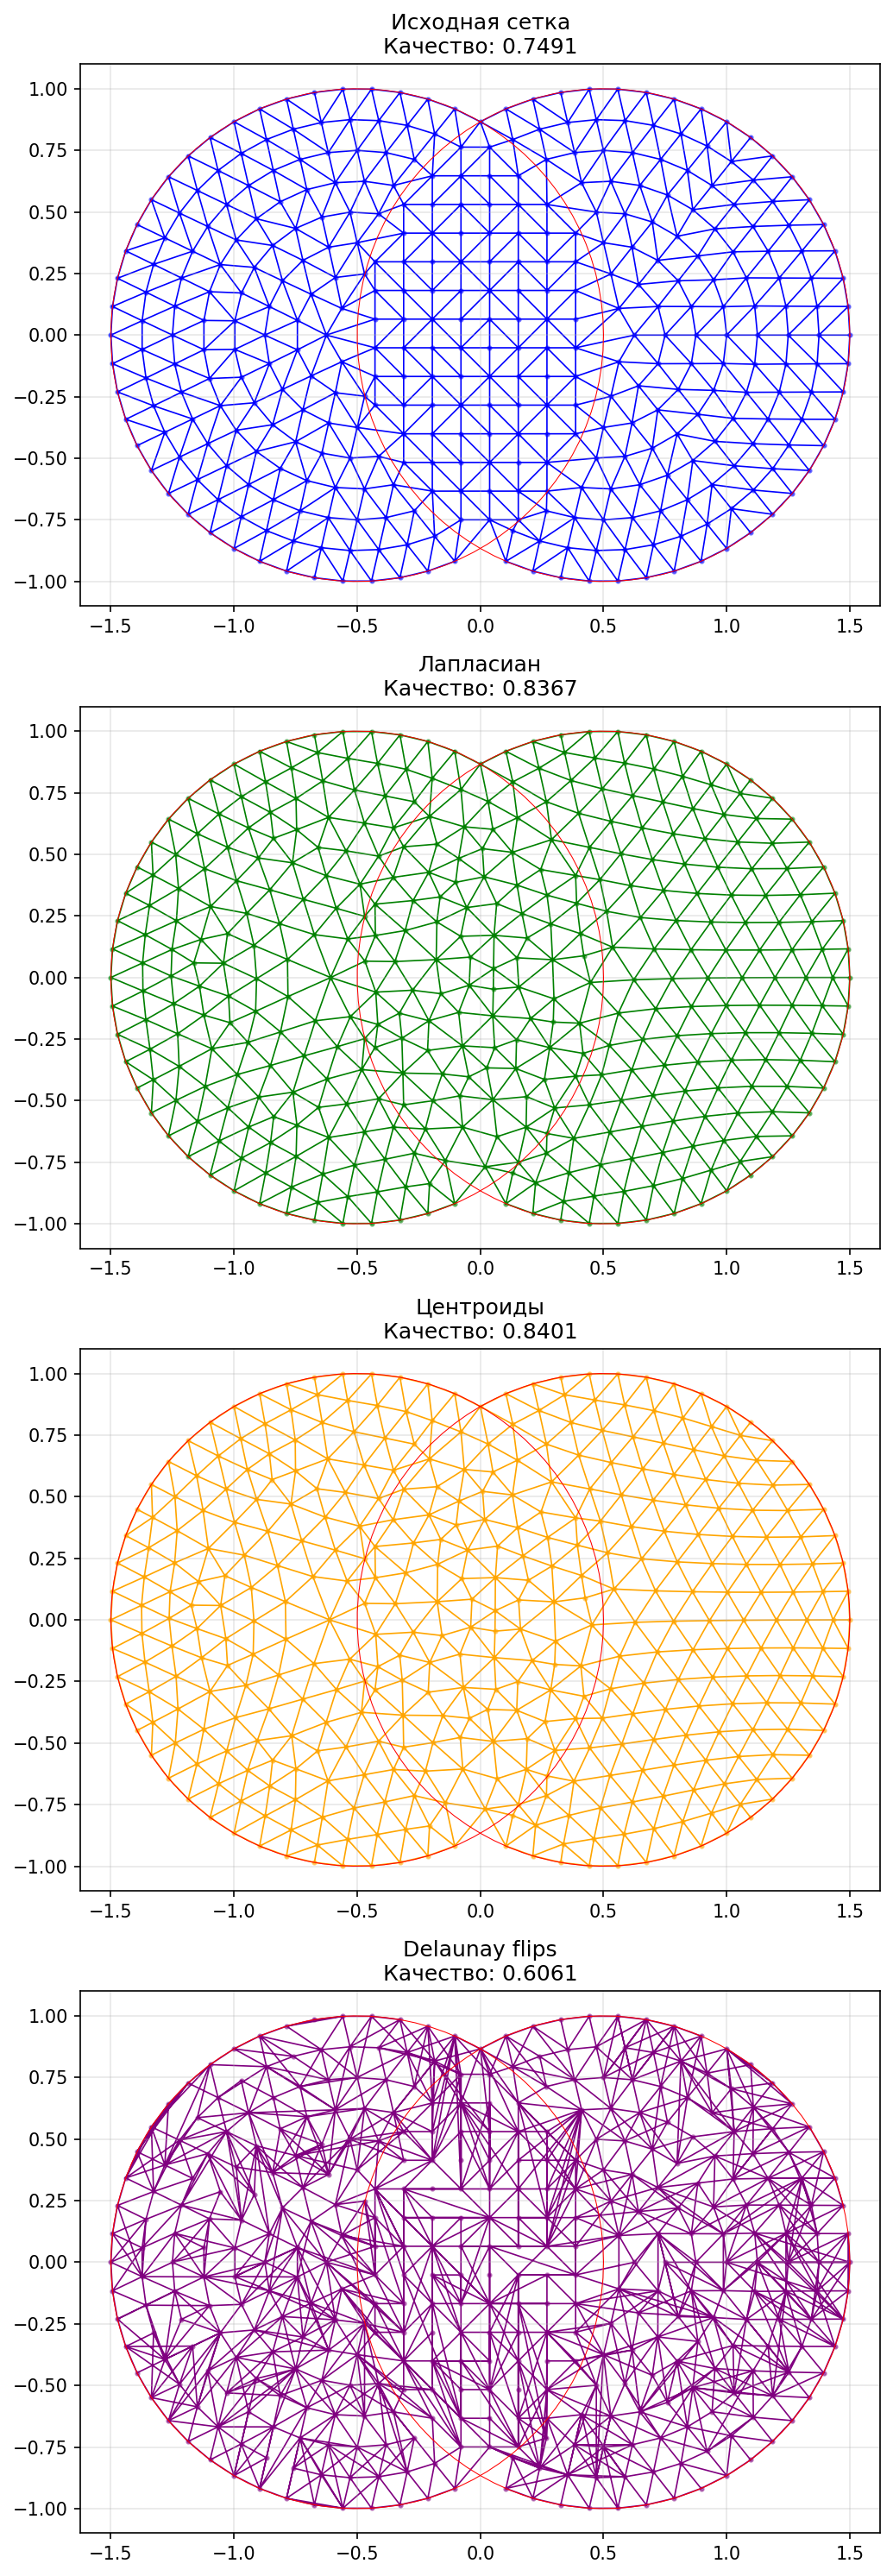

In [60]:
# Определяем граничные точки для двух окружностей
first_center_double = [-CIRCLE_DISTANCE_DOUBLE / 2, 0]
second_center_double = [CIRCLE_DISTANCE_DOUBLE / 2, 0]

def is_boundary_point_double(x, y):
    dist1_double = np.sqrt((x - first_center_double[0])**2 + (y - first_center_double[1])**2)
    dist2_double = np.sqrt((x - second_center_double[0])**2 + (y - second_center_double[1])**2)
    return abs(dist1_double - 1) < 0.05 or abs(dist2_double - 1) < 0.05

boundary_mask_double = np.array([is_boundary_point_double(x, y) for x, y in mesh_points_double])

# Улучшаем сетку двумя методами
improved_points_laplacian_double = improve_mesh(
    mesh_points_double,
    boundary_mask=boundary_mask_double,
    method='laplacian',
    iterations=20,
    alpha=0.6
)

improved_points_centroid_double = improve_mesh(
    mesh_points_double,
    boundary_mask=boundary_mask_double,
    method='centroid',
    iterations=20,
    alpha=0.6
)

# Фильтруем треугольники для улучшенных сеток
triangulation_laplacian_double = Delaunay(improved_points_laplacian_double)
valid_triangles_laplacian_double = filter_invalid_triangles_double(
    improved_points_laplacian_double,
    triangulation_laplacian_double.simplices,
    circle_radius_double=1,
    circle_distance_double=CIRCLE_DISTANCE_DOUBLE
)

triangulation_centroid_double = Delaunay(improved_points_centroid_double)
valid_triangles_centroid_double = filter_invalid_triangles_double(
    improved_points_centroid_double,
    triangulation_centroid_double.simplices,
    circle_radius_double=1,
    circle_distance_double=CIRCLE_DISTANCE_DOUBLE
)

# Применяем Delaunay flips к оригинальной сетке
triangles_after_flips = delaunay_flips(mesh_points_double, valid_triangles_double)

# Фильтруем треугольники после flips
valid_triangles_flips = filter_invalid_triangles_double(
    mesh_points_double,
    triangles_after_flips,
    circle_radius_double=1,
    circle_distance_double=CIRCLE_DISTANCE_DOUBLE
)

# Вычисляем качество сеток
quality_original_double = calculate_mesh_quality_rms(mesh_points_double, valid_triangles_double)
quality_laplacian_double = calculate_mesh_quality_rms(improved_points_laplacian_double, valid_triangles_laplacian_double)
quality_centroid_double = calculate_mesh_quality_rms(improved_points_centroid_double, valid_triangles_centroid_double)
quality_flips = calculate_mesh_quality_rms(mesh_points_double, valid_triangles_flips)

print(f"Качество исходной сетки: {quality_original_double:.4f}")
print(f"Качество после Лапласиана: {quality_laplacian_double:.4f}")
print(f"Качество после Центроидов: {quality_centroid_double:.4f}")
print(f"Качество после Delaunay flips: {quality_flips:.4f}")
print(f"Улучшение Лапласиан: {((quality_laplacian_double - quality_original_double) / quality_original_double * 100):.1f}%")
print(f"Улучшение Центроиды: {((quality_centroid_double - quality_original_double) / quality_original_double * 100):.1f}%")
print(f"Улучшение Delaunay flips: {((quality_flips - quality_original_double) / quality_original_double * 100):.1f}%")

# Визуализация сравнения - вертикальное расположение
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(7, 20), dpi=150)

# Исходная сетка (синяя)
ax1.triplot(
    mesh_points_double[:, 0],
    mesh_points_double[:, 1],
    valid_triangles_double,
    linewidth=0.8,
    color='blue'
)

ax1.plot(
    mesh_points_double[:, 0],
    mesh_points_double[:, 1],
    'o',
    markersize=2,
    alpha=0.5,
    color='blue'
)

circle_angles_double = np.linspace(0, 2 * np.pi, 100)
ax1.plot(
    -CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)
ax1.plot(
    CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)

ax1.axis('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title(f'Исходная сетка\nКачество: {quality_original_double:.4f}')

# Улучшенная сетка методом Лапласиана (зеленая)
ax2.triplot(
    improved_points_laplacian_double[:, 0],
    improved_points_laplacian_double[:, 1],
    valid_triangles_laplacian_double,
    linewidth=0.8,
    color='green'
)

ax2.plot(
    improved_points_laplacian_double[:, 0],
    improved_points_laplacian_double[:, 1],
    'o',
    markersize=2,
    alpha=0.5,
    color='green'
)

ax2.plot(
    -CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)
ax2.plot(
    CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)

ax2.axis('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title(f'Лапласиан\nКачество: {quality_laplacian_double:.4f}')

# Улучшенная сетка методом Центроидов (оранжевая)
ax3.triplot(
    improved_points_centroid_double[:, 0],
    improved_points_centroid_double[:, 1],
    valid_triangles_centroid_double,
    linewidth=0.8,
    color='orange'
)

ax3.plot(
    improved_points_centroid_double[:, 0],
    improved_points_centroid_double[:, 1],
    'o',
    markersize=2,
    alpha=0.5,
    color='orange'
)

ax3.plot(
    -CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)
ax3.plot(
    CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)

ax3.axis('equal')
ax3.grid(True, alpha=0.3)
ax3.set_title(f'Центроиды\nКачество: {quality_centroid_double:.4f}')

# Сетка после Delaunay flips (фиолетовая)
ax4.triplot(
    mesh_points_double[:, 0],
    mesh_points_double[:, 1],
    valid_triangles_flips,
    linewidth=0.8,
    color='purple'
)

ax4.plot(
    mesh_points_double[:, 0],
    mesh_points_double[:, 1],
    'o',
    markersize=2,
    alpha=0.5,
    color='purple'
)

ax4.plot(
    -CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)
ax4.plot(
    CIRCLE_DISTANCE_DOUBLE / 2 + np.cos(circle_angles_double),
    np.sin(circle_angles_double),
    'r-',
    linewidth=0.5
)

ax4.axis('equal')
ax4.grid(True, alpha=0.3)
ax4.set_title(f'Delaunay flips\nКачество: {quality_flips:.4f}')

plt.tight_layout()
plt.show()